In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

In [3]:
# Import dataset 

athletes = pd.read_csv(r"C:\Users\bjr\Documents\Python Scripts\athlete_events.csv")

In [8]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [27]:
print(athletes['Year'].max())
print(athletes['Year'].min())

2016
1896


In [25]:
# Numarul de medalii castigate de Romania la inot, impartit pe sexe.

query = '''
SELECT
  Sex,
  COUNT(medal) AS nr_medals,
  MAX(Year) as last_won
FROM
  atheletes
WHERE 
  Medal IS NOT NULL 
  AND 
  Sport = 'Swimming'
  AND
  Team = 'Romania'
GROUP BY
  Sex, Medal
'''

pysqldf(query)

,Sex,nr_medals,last_won
0,F,3,2000
1,F,3,2004
2,F,2,2000
3,M,1,2004


In [30]:
# Distributia de inaltime pe sexe la inot

query = '''
SELECT
  Sex,
  AVG(Height) AS avg_height,
  Medal
FROM
  atheletes
WHERE 
  Medal IS NOT NULL 
  AND 
  Sport = 'Swimming'
GROUP BY
  Sex, Medal
'''

pysqldf(query)

,Sex,avg_height,Medal
0,F,173.405914,Bronze
1,F,174.348730,Gold
2,F,174.282116,Silver
3,M,185.942584,Bronze
4,M,188.021912,Gold
5,M,186.832957,Silver


In [38]:
# Media de inaltime, impartita pe sexe, doar intre castigatorii de medalii pt sportul: inot

sql = '''
SELECT
  Sex,
  AVG(Height) AS avg_height,
  Medal
FROM
  atheletes
WHERE 
  Medal IS NOT NULL 
  AND 
  Sport = 'Swimming'
GROUP BY
  Sex, Medal
'''
df = pysqldf(sql)
df

In [57]:
# Top 5 locatii cu cele mai multe competitii de inot

sql = '''
SELECT
  COUNT(Event) AS most_events,
  MAX(Year)  AS last_time,
  City
FROM
  atheletes
WHERE  
  Sport = 'Swimming'
GROUP BY
  City
ORDER BY
  most_events DESC
LIMIT 5  
'''
df1 = pysqldf(sql)
df1

,most_events,last_time,City
0,2086,2012,London
1,1749,2008,Beijing
2,1741,2000,Sydney
3,1714,2004,Athina
4,1635,1996,Atlanta


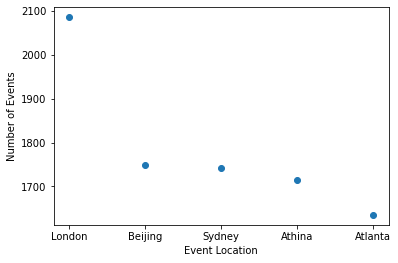

In [60]:
plt.scatter(df1['City'],df1['most_events'])
plt.ylabel('Number of Events')
plt.xlabel('Event Location')
plt.show()

In [63]:
# Country with most medals - swimming

sql = '''
SELECT
  COUNT(Medal) AS most_medals,
  Medal,
  MAX(Year)  AS last_time,
  Team
FROM
  atheletes
WHERE  
  Sport = 'Swimming'
  AND
  Medal = 'Gold'
GROUP BY
  Team
ORDER BY
  most_medals DESC
LIMIT 10  
'''
df2 = pysqldf(sql)
df2

,most_medals,Medal,last_time,Team
0,645,Gold,2016,United States
1,118,Gold,2016,Australia
2,62,Gold,1988,East Germany
3,36,Gold,2016,Hungary
4,30,Gold,2016,Netherlands
5,28,Gold,2016,Japan
6,23,Gold,2016,Great Britain
7,18,Gold,1988,Soviet Union
8,13,Gold,2008,Germany
9,13,Gold,2012,France


Atentie, mai sus observam ca 62 de medalii sunt atribuite Germaniei de Est, pentru ca acele medalii au fost castigate inainte de caderea zidului Berlinului. Acest lucru trebuie rectificat.

In [64]:
# Country with most female gold medalists - swimming

sql = '''
SELECT
  COUNT(Medal) AS most_medals,
  Medal,
  MAX(Year)  AS last_time,
  Team
FROM
  atheletes
WHERE  
  Sport = 'Swimming'
  AND
  Medal = 'Gold'
  AND
  Sex = 'F'
GROUP BY
  Team
ORDER BY
  most_medals DESC
LIMIT 10  
'''
df2 = pysqldf(sql)
df2

,most_medals,Medal,last_time,Team
0,264,Gold,2016,United States
1,65,Gold,2016,Australia
2,56,Gold,1988,East Germany
3,25,Gold,2016,Netherlands
4,18,Gold,2016,Hungary
5,10,Gold,2012,China
6,9,Gold,2008,Great Britain
7,5,Gold,2016,Japan
8,5,Gold,2008,Germany
9,4,Gold,2004,Ukraine


Din nou observam cum 56 de medalii sunt gresit atribuite Germaniei de Est.

Sa presupunem ca vrem sa vedem in ce sport ar trebui sa investim cel mai mult si ca avem ca indicatie sa il alegem pe acela, care a adus cele mai multe rezultate pana acum.

In [73]:
# Sportul care a adus cele mai multe medalii pt Romania dupa anul 2010 

sql = '''
SELECT
  Sport,
  COUNT(Medal) AS most_medals,
  Medal,
  MAX(Year)  AS last_time,
  Team
FROM
  atheletes
WHERE
  Team = 'Romania'
GROUP BY
  Sport, Medal
HAVING
  most_medals >= 2
  AND
  last_time > 2010
ORDER BY
  most_medals DESC
'''
df3 = pysqldf(sql)
df3

,Sport,most_medals,Medal,last_time,Team
0,Gymnastics,55,Bronze,2012,Romania
1,Rowing,52,Bronze,2016,Romania
2,Gymnastics,40,Gold,2012,Romania
3,Gymnastics,40,Silver,2012,Romania
4,Wrestling,18,Bronze,2016,Romania
5,Fencing,14,Silver,2012,Romania
6,Fencing,7,Gold,2016,Romania
7,Weightlifting,7,Silver,2012,Romania
8,Shooting,6,Gold,2012,Romania
9,Weightlifting,4,Bronze,2012,Romania


Care este cel mai medaliat sportiv la inot? 

In [77]:
# Sportivii cei mai medaliati pentru disciplina: inot

sql = '''
SELECT
  Name,
  COUNT(Medal) AS most_medals
FROM
  atheletes
WHERE
  Sport = 'Swimming'
  AND
  Medal IS NOT NULL
GROUP BY
  Name
HAVING
  most_medals >= 2
ORDER BY
  most_medals DESC
LIMIT 10
'''
df4 = pysqldf(sql)
df4

,Name,most_medals
0,"Michael Fred Phelps, II",28
1,Ryan Steven Lochte,12
2,Natalie Anne Coughlin (-Hall),12
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
4,"Dara Grace Torres (-Hoffman, -Minas)",12
5,"Matthew Nicholas ""Matt"" Biondi",11
6,Mark Andrew Spitz,11
7,"Gary Wayne Hall, Jr.",10
8,Franziska van Almsick,10
9,Zoltn Imre dn von Halmay,9


Stim de pe wikipedia faptul ca Michael Phelps are mult mai multe medalii de fapt. Ceea ce inseamna ca setul de date este incomplet.

In continuare vrem sa vedem nr de medalii castigate de Michael Phelps pe ani, presupunand ca vom obtine o distributie normala. 

In [81]:
# Medaliile lui Michael Phelps impartite pe ani

sql = '''
SELECT
  Name,
  Year,
  COUNT(Medal) AS medals_per_year
FROM
  atheletes
WHERE
  Sport = 'Swimming'
  AND
  Medal IS NOT NULL
  AND
  Name = 'Michael Fred Phelps, II'
GROUP BY
  Year
'''
df5 = pysqldf(sql)
df5

,Name,Year,medals_per_year
0,"Michael Fred Phelps, II",2004,8
1,"Michael Fred Phelps, II",2008,8
2,"Michael Fred Phelps, II",2012,6
3,"Michael Fred Phelps, II",2016,6


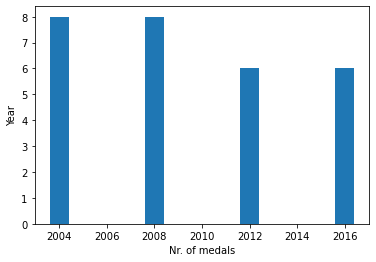

In [84]:
plt.bar(df5.Year,df5.medals_per_year)
plt.xlabel('Nr. of medals')
plt.ylabel('Year')
plt.show()

Nu este o analiza prea folositoare.

Se pare ca pentru inot avem date doar de la olimpiade. Hai sa vedem pentru ce sport avem cele mai multe date si sa incercam o analiza statistica de predictie pentru acel sport.

In [89]:
# Sportul cel mai reprezentat din setul de date

sql = '''
SELECT
  Sport                 AS  sport,
  COUNT(DISTINCT Year)  AS  nr_years_covered,
  COUNT(DISTINCT Event) AS  nr_events_covered 
FROM
  atheletes
GROUP BY
  Sport
ORDER BY
  nr_events_covered DESC
LIMIT 5
'''
df6 = pysqldf(sql)
df6

,sport,nr_years_covered,nr_events_covered
0,Shooting,27,83
1,Athletics,29,83
2,Swimming,29,55
3,Cycling,29,44
4,Sailing,26,38


Se pare ca avem foarte multe evenimente pentru atletism si tir. Haide sa ne uitam la atletism sa vedem daca nu cumva sunt tot date de la olimpiade.

<AxesSubplot:>

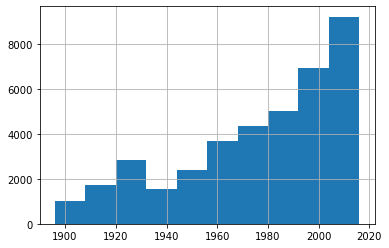

In [92]:
# Anii de atletism

sql = '''
SELECT
  Sport,
  Year,
  Event
FROM
  atheletes
WHERE
  Sport = 'Athletics'
'''
df6 = pysqldf(sql)
df6['Year'].hist()

Dar gresesc! Pentru ca este la fel si pt inot! Deci are legatura cu faptul ca Michael Phelps a participat in principal doar la olimpiade.

<AxesSubplot:>

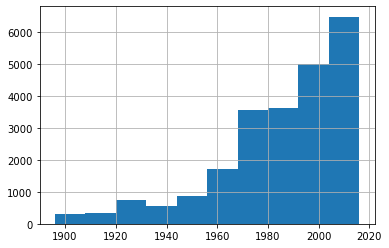

In [93]:
# Anii de inot

sql = '''
SELECT
  Sport,
  Year,
  Event
FROM
  atheletes
WHERE
  Sport = 'Swimming'
'''
df6 = pysqldf(sql)
df6['Year'].hist()

In [9]:
# Se pare ca femeile sunt totusi mai putine in sportul romanesc decat barbatii chiar si excluzand fotbalul
query = '''
SELECT
  COUNT(DISTINCT id) AS nr_sportsmen,
  sex
FROM
  athletes
WHERE
  Team = 'Romania'
  AND 
  Sport IS NOT "Football"
GROUP BY
  sex
'''

pysqldf(query)

,nr_sportsmen,Sex
0,554,F
1,1161,M


In [11]:
# Dar daca numeri doar sportivii de dupa anii 2000 rezulta ca sunt mai multe sportive decat sportivi de performanta in Romania
# Totodata a se observa ca in cazul barbatilor avem aproape de 10 ori mai putini sportivi activi.
# Acest lucru ne arata o lipsa a investitiei in acest sector de activitate, ce se translateaza si in numarul
  # relativ mic de medalii obtinute.

query = '''
SELECT
  COUNT(DISTINCT id) AS nr_sportsmen,
  sex
FROM
  athletes
WHERE
  Team = 'Romania'
  AND 
  Sport IS NOT "Football"
  AND 
  Year > 2000
GROUP BY
  sex
'''
pysqldf(query)

,nr_sportsmen,Sex
0,191,F
1,173,M


In [15]:
query = '''
SELECT
  Sex,
  COUNT (DISTINCT id) AS distinct_winners,
  COUNT(medal) AS nr_medals,
  Medal,
  MAX(Year) as last_won
FROM
  athletes
WHERE 
  Medal IS NOT NULL 
  AND
  Team = 'Romania'
GROUP BY
  Sex, Medal
'''

pysqldf(query)

,Sex,distinct_winners,nr_medals,Medal,last_won
0,F,110,130,Bronze,2016
1,F,76,121,Gold,2016
2,F,87,104,Silver,2012
3,M,140,160,Bronze,2016
4,M,35,40,Gold,2012
5,M,87,96,Silver,2016
